Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
R-squared: 0.6341189942328371
Root Mean Squared Error: 52975.71771338122
      GrLivArea  BedroomAbvGr  FullBath  Actual SalePrice  Predicted SalePrice
892        1068             3         1            154500        113410.672553
1105       2622             3         2            325000        305081.877759
413        1028             2         1            115000        135904.785630
522        1664             3         2            159000        205424.675641
1036       1620             2         2            315500        227502.683490


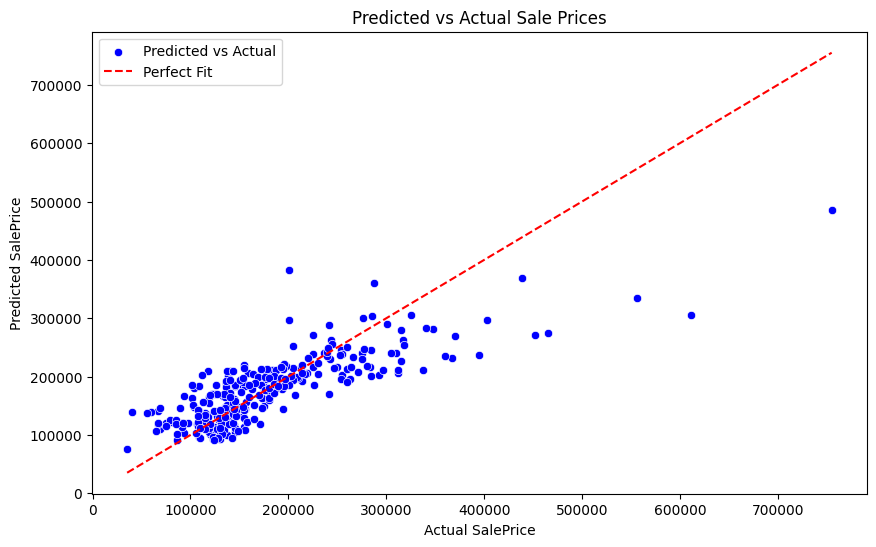

Model Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461


In [21]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths (replace with your actual file path in Google Drive)
train_file_path = '/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv'
test_file_path = '/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv'
# Load the CSV file
train_data = pd.read_csv(train_file_path)

# Select only the relevant columns: square footage (GrLivArea), number of bedrooms (BedroomAbvGr), and bathrooms (FullBath)
# Ensure that 'SalePrice' is your target variable
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target_variable = 'SalePrice'

# Drop rows with NaN values in the selected features or target
train_data = train_data[selected_features + [target_variable]].dropna()

# Define the feature columns (X) and the target variable (y)
X = train_data[selected_features]
y = train_data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and RMSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print R-squared and RMSE
print(f'R-squared: {r_squared}')
print(f'Root Mean Squared Error: {rmse}')

# Create a DataFrame to compare actual vs predicted values along with features
comparison_df = X_test.copy()  # Copy features DataFrame
comparison_df['Actual SalePrice'] = y_test.values  # Add actual prices
comparison_df['Predicted SalePrice'] = y_pred  # Add predicted prices

# Print the first few rows of the comparison DataFrame
print(comparison_df.head())

# Plot predicted vs actual prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit") # A diagonal line to represent perfect predictions
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual Sale Prices")
plt.legend()
plt.show()

# Optionally, you can print model coefficients (i.e., the impact of each feature on price)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
